In [151]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski



In [6]:
"""Code is copied from the Jupyter notebook from lecture"""
def get_bits(number):
    """For a NumPy quantity, return bit representation
    
    Inputs:
    ------
    number : NumPy value
        value to convert into list of bits
        
    Returns:
    -------
    bits : list
       list of 0 and 1 values, highest to lowest significance
    """
    bytes = number.tobytes()
    bits = []
    for byte in bytes:
        bits = bits + np.flip(np.unpackbits(np.uint8(byte)), np.uint8(0)).tolist()
    return list(reversed(bits))

In [41]:
"""Code is copied from the Jupyter notebook from lecture"""

value=np.float32(100.98763)
bitlist=get_bits(np.float32(value))
sign = bitlist[0]
exponent = bitlist[1:9]
mantissa = bitlist[9:32]
template = """{value} decimal ->
sign = {sign} 
exponent = {exponent} 
mantissa = {mantissa}"""
print(template.format(value=value, sign=sign, exponent=exponent, mantissa=mantissa))


100.98763275146484 decimal ->
sign = 0 
exponent = [1, 0, 0, 0, 0, 1, 0, 1] 
mantissa = [1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1]


In [42]:
Ex=0

for i in np.arange(len(exponent)):
    Ex=Ex+exponent[i]*2**(len(exponent) - 1 - i)

Ex=Ex-127
print("E=",Ex)
mant=1

for i in np.arange(len(mantissa)):
    mant=mant+mantissa[i]*2.0**-(i+1)

IEEEvalue=2**Ex*mant
print("Mant =", mant)
print("VAlue =",IEEEvalue)
print("Difference =" ,100.98763275146484-100.98763)


E= 6
Mant = 1.5779317617416382
VAlue = 100.98763275146484


In [63]:
value32=np.float32(1e-40)
one32=np.float32(1.)
while one32-value32==one32:
    value32=value32*1.0001

print(value32)


2.9803843e-08


In [65]:
value64=np.float64(1e-40)
one64=np.float64(1.)
while one64-value64==one64:
    value64=value64*1.0001

print(value64)

5.551172870064363e-17


In [84]:
maximum32=np.float32(1.)


while True:
    maximum32updated=maximum32*1.0001
    if maximum32updated==float("inf"):
        print(maximum32)
        break
    maximum32=maximum32updated


3.4026748e+38


C:\Users\frede\AppData\Local\Temp\ipykernel_14056\3279369828.py:5: RuntimeWarning: overflow encountered in scalar multiply
  maximum32updated=maximum32*1.0001


'\nwhile True:\n    try:\n        maximum32=maximum32updated\n        maximum32updated = maximum32*1.1 \n        if maximum32updated==float("inf"):\n            raise OverflowError\n        \n    except OverflowError:\n        print("Overflow",maximum32)\n        break\n'

In [85]:
maximum64=np.float64(1e40)


while True:
    maximum64updated=maximum64*1.0001
    if maximum64updated==float("inf"):
        print(maximum64)
        break
    maximum64=maximum64updated

1.797526640574306e+308


C:\Users\frede\AppData\Local\Temp\ipykernel_14056\2014196326.py:5: RuntimeWarning: overflow encountered in scalar multiply
  maximum64updated=maximum64*1.0001


In [95]:
min32=np.float32(1e-40)


while True:
    min32updated=min32*0.2
    if min32updated==0.0:
        print(min32)
        break
    min32=min32updated


1e-45


In [96]:
min64=np.float64(1e-40)


while True:
    min64updated=min64*0.2
    if min64updated==0.0:
        print(min64)
        break
    min64=min64updated

1e-323


In [128]:
%%timeit
L=20
M=0
for i in np.arange(-L,L):
    for j in np.arange(-L,L):
        for k in np.arange(-L,L):
            if (i+j+k) % 2==0:
                q=-1
            else:
                q=1
            if i**2+j**2+k**2!=0:
                M+=q/(np.sqrt(i**2+j**2+k**2))
            

print("The Madelung constant is:",M)



The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
The Madelung constant is: 1.7475648452181796
395 ms ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [136]:
#%%timeit
L=20
i, j, k = np.meshgrid(np.arange(-L, L+1), np.arange(-L, L+1), np.arange(-L, L+1))


r = np.sqrt(i**2 + j**2 + k**2)


r[L, L, L] = np.inf

# Essentially removing the singularity by setting 1/r to zero. 

charge_factor = (-1.)**(i + j + k)

M = np.sum(-charge_factor / r)


print(M)

1.719401169454088


In [198]:
N=2000
plane=np.zeros((N,N))
axis_arr=np.arange(-2,2,4/N)



for i in np.arange(len(axis_arr)):
    for h in np.arange(len(axis_arr)):
        c=axis_arr[i]+axis_arr[h]*1j
        k=0
        z=c
        while k < 100:
            z=z**2+c
            k+=1
            if np.absolute(z)>2:
                plane[i,h]=k
                break
        if np.absolute(z)<2:
            plane[i,h]=101


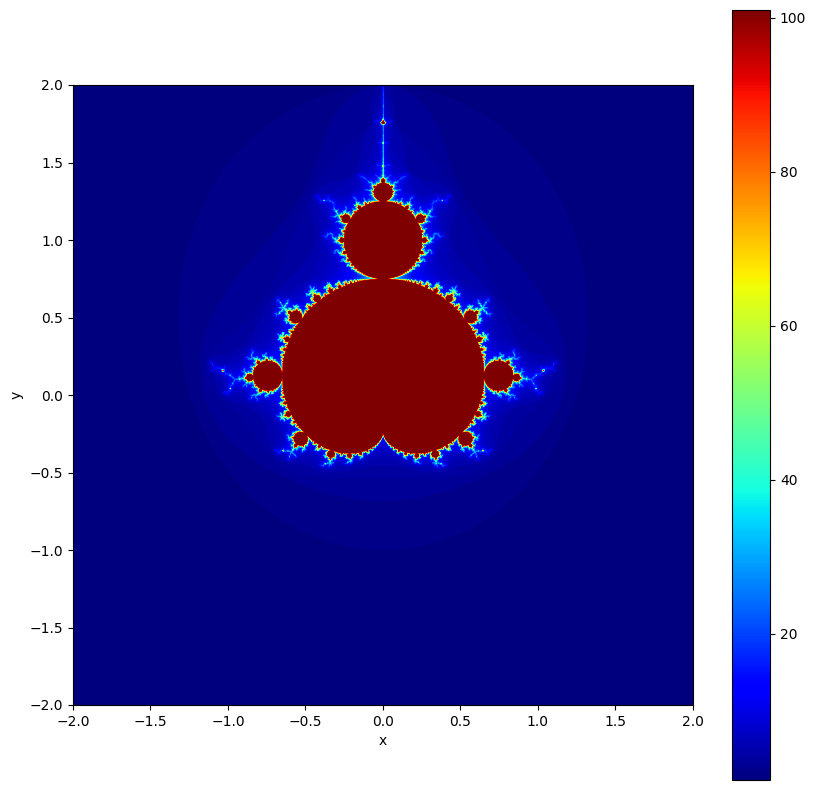

In [199]:

plt.figure(figsize=(10,10))
plt.imshow(plane,cmap=("jet"),extent=[-2, 2, -2, 2])
plt.savefig("fractal.png")
plt.xlabel("x")
plt.ylabel("y")

plt.colorbar()
plt.savefig("fractal.png")
#image=im.fromarray(plane)
#image.save('fractals.png') 



In [217]:
def quadratic_solver1(a,b,c):
    """Solves quadratic equations of the form:
    ax^2+bx+c=0"""
    return [(-b+np.sqrt(b**2-4*a*c))/(2*a),(-b-np.sqrt(b**2-4*a*c))/(2*a)]

def quadratic_solver2(a,b,c):
    """Solves quadratic equations of the form:
    ax^2+bx+c=0 with a variation to the standard formula"""
    return [2*c/(-b-np.sqrt(b**2-4*a*c)),2*c/(-b+np.sqrt(b**2-4*a*c))]

In [218]:
x_solutions1=quadratic_solver1(0.001,1000,0.001)
x_solutions2=quadratic_solver2(0.001,1000,0.001)
print("Roots for the first solver: ",x_solutions1[0],x_solutions1[1])
print("Roots for the second solver: ", x_solutions2[0],x_solutions2[1])

Roots for the first solver:  -9.999894245993346e-07 -999999.999999
Roots for the second solver:  -1.000000000001e-06 -1000010.5755125057
